In [1]:
import requests
from bs4 import BeautifulSoup
import time
import jieba
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import warnings; warnings.simplefilter('ignore')

# 1：实验数据准备阶段

## 1.1 网络爬虫

In [2]:
def getHtml(url):
    try:
        r = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
        r.raise_for_status()
        r.encoding = "utf-8"
        return r.text
    except:
        print("Failed!!!")

In [3]:
def getData(html):
    soup = BeautifulSoup(html,"html.parser")
    comments = soup.find('div',attrs={'class':'mod-bd'})
    for comment in comments.find_all('div',attrs={'class':'comment-item'}):
        
        comment_content = comment.find('span',attrs={'class':'short'}).get_text()
        comment_list.append(comment_content)
        
        comment_user = comment.find('a').get('title')
        name_list.append(comment_user)
        
        comment_time = comment.find('span',attrs={'class':'comment-time'}).get('title')    
        time_list.append(comment_time)

In [4]:
k = 0  
i = 0
name_list=[]
time_list=[]
comment_list = [] 

while k < 200:
    url = 'https://movie.douban.com/subject/32659890/comments?start=' + str(k) + '&limit=20&sort=new_score&status=P'
    k += 20              # 根据网页特征，每次k增加20代表下一页
    i += 1
    print("正在爬取第" + str(i) + "页的数据")
    html = getHtml(url)  # 使用requests，提出请求，爬取网页数据，返回text
    getData(html)        # 使用BeautifulSoup，对爬取的text进行解析，存储 评论人、评论时间、评论内容
print('爬取数据成功！')


正在爬取第1页的数据
正在爬取第2页的数据
正在爬取第3页的数据
正在爬取第4页的数据
正在爬取第5页的数据
正在爬取第6页的数据
正在爬取第7页的数据
正在爬取第8页的数据
正在爬取第9页的数据
正在爬取第10页的数据
爬取数据成功！


## 1.2 进行分词操作，并去除停用词

In [15]:
comment_list

['就像什么呢，就像一个小伙子想对女孩表达爱意，有太多的甜言蜜语可讲，而七个小伙儿一拥而上同时表白，除了“爱爱爱”就听不到别的声音了，慷慨激昂又空洞苍白。',
 '第三段那个小男孩太棒了',
 '最喜欢女排那个故事，小演员太可爱了。     优叔一出现感觉过年了。',
 '如果建国史是一个成年人的话，他是具有深度遗忘症的人，只有童年和中年的记忆，不反思、不回忆。他的回忆方程式是中年的成功全源自童年记忆。参与国史写作的人是被挑选的，真正的人民都是煽情故事的背景板。中国导演对戏剧是不是有误解，他们的三板斧：1.煽情、最后一分钟营救，感动是第一要务。 2.人物成年的努力一定来自童年。3.高昂的歌曲必定是奏响，人多力量大。 陈凯歌导演写作文连逻辑都不要了。',
 '我以前是不怎么感冒献礼片的，这次因为朱一龙的缘故关注了我和我的祖国，才发现我比自己想象中更爱这个国家。这部献礼片的意义，是串联，是纪念，是传承，非常适合全家一起观看。',
 '几种价值：\n1.因为我们是中国人，所以我们应该无条件为国家利益放弃所有个人情感。（《相遇》《夺冠》）\n2.国家意识可以抹平一切个体差异带来的冲突（《前夜》），可以解决一切现实的问题（《白昼流星》）。\n3.曾经为集体付出的，体制必将会议某种形式进行补偿（《夺冠》《回归》）。\n4.精英主义充斥全片，那么究竟是谁和谁的祖国？',
 '竟然超出预期，竟然陈凯歌最差',
 '《我和我的祖国》回归篇真实再现了香港回归的场景，青年演员朱一龙在其中饰演了一名护旗手，当他迈着坚定的步伐走向升旗台时，我好像也到了那个庄严肃穆的现场，那种澎湃激动的心情难以言表。',
 '《北京你好》最佳。宁浩竟然能把北京奥运会如此盛大的赛事拍得那么接地气，而且笑中带泪。\n以一张奥运会门票为线索，巧妙串起2008年另一件事。\n表面上是喜剧，内核其实是悲剧，笑着笑着就哭了。\n《前夜》次之。当他们以为没有人理他们的时候，结果所有人都尽了绵薄之力，从烟斗到勺子，从铁锤到长命锁，瞬间泪崩。\n《夺冠》和《北京你好》类似，都是透过老百姓的视角反映大时代大事件，主角不是伟人，也没有什么轰轰烈烈的壮举，但是最能让人共鸣。\n《白昼流星》借助航天探讨贫富差距。\n这个年代人类已经能进入太空，也有的人还看不起病、买不起衣服。\n扶贫不仅仅在于物质层面，更重要的是对教育和思想的扶贫。\

In [6]:
comment_part_list =[]
stopwords = [line.strip() for line in open('stopwords.txt','r',encoding='utf-8').readlines()]
for i in range(len(comment_list)):
    sentence_seged = jieba.cut(comment_list[i],cut_all=False)
    final = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                final +=word
                final +=" "
    comment_part_list.append(final)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HARVEY~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.110 seconds.
Prefix dict has been built successfully.


## 1.3 存储实验数据

In [7]:
dict_data = {'Name':pd.Series(name_list),
             'Time':pd.Series(time_list),
             'Comment':pd.Series(comment_list),
             'Comment Part':pd.Series(comment_part_list)}
comment_df = pd.DataFrame(dict_data)
#comment_df.to_csv('我和我的祖国电影评论.csv',encoding="utf_8_sig") 

# 2：文本特征工程

## 2.1 统计高频词并可视化

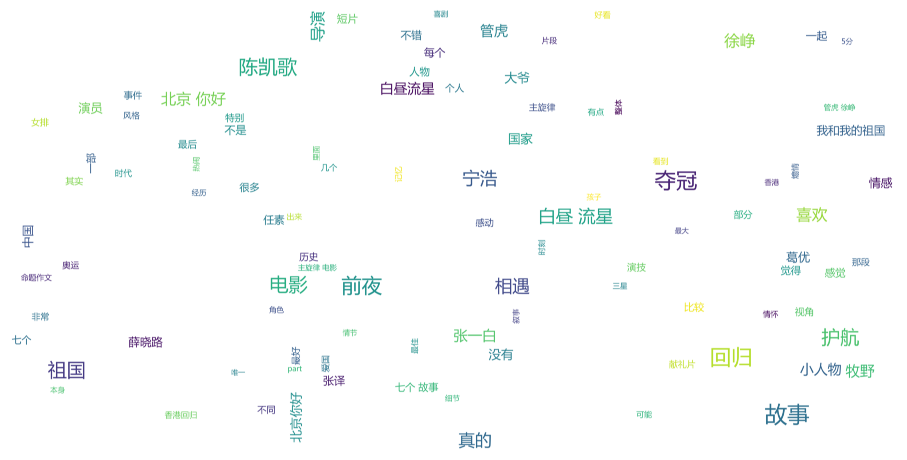

In [164]:
cut_text = open('我和我的祖国电影评论.csv', 'r', encoding='utf-8').read()  # 加载内容
wordcloud = WordCloud(
    height=8000,  # 设置图片高度
    width=16000,  # 设置图片宽度
    background_color='white',
    max_words=100,  # 设置最大词数
    max_font_size=400,
    font_path="C:\Windows\Fonts\msyh.ttc",  # 如有口型乱码问题,可进入目录更换字体
).generate(cut_text)


plot.imshow(wordcloud, interpolation='bilinear')
plot.axis('off')  # 去掉坐标轴
plot.savefig('评论高频词云图示.png') #存为图片
plot.show()        #直接显示

## 2.2 文档-词项矩阵（词袋模型）

In [11]:
comment_part_list[0]

'小伙子 想 女孩 表达 爱意 有太多 甜言蜜语 讲 七个 小伙儿 一拥而上 表白 爱爱爱 听 不到 声音 慷慨激昂 空洞 苍白 '

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
comment_part_ndarray = np.array(comment_part_list)
statistics_bwm = CountVectorizer(min_df=0., max_df=1.)
comment_vectorization_bwm_ndarray = statistics_bwm.fit_transform(comment_part_ndarray).toarray()

In [8]:
comment_vectorization_bwm_ndarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
print(statistics_bwm.fit_transform(comment_part_ndarray))

  (0, 2073)	2
  (0, 2408)	1
  (0, 2639)	1
  (0, 2588)	1
  (0, 1550)	1
  (1, 2588)	1
  (1, 1179)	1
  (1, 2216)	1
  (1, 1228)	1
  (1, 2229)	1
  (1, 1557)	1
  (1, 1593)	1
  (2, 2073)	1
  (2, 586)	3
  (2, 393)	2
  (2, 1543)	1
  (2, 961)	1
  (2, 917)	2
  (2, 1942)	1
  (2, 2396)	1
  (2, 1398)	1
  (2, 1071)	1
  (2, 77)	1
  (2, 2579)	1
  (2, 2136)	1
  :	:
  (199, 1060)	1
  (199, 2305)	2
  (199, 257)	1
  (199, 725)	1
  (199, 2289)	1
  (199, 1499)	1
  (199, 2677)	1
  (199, 2157)	1
  (199, 2681)	1
  (199, 2673)	1
  (199, 96)	1
  (199, 735)	1
  (199, 1939)	1
  (199, 1226)	1
  (199, 653)	1
  (199, 2203)	1
  (199, 1151)	2
  (199, 2150)	1
  (199, 1676)	1
  (199, 306)	1
  (199, 1078)	1
  (199, 400)	1
  (199, 126)	1
  (199, 2461)	1
  (199, 2137)	1


In [10]:
statistics_bwm.vocabulary_.get("中国")

233

In [12]:
statistics_bwm.inverse_transform(statistics_bwm.fit_transform(comment_part_ndarray))

[array(['竟然', '超出', '预期', '陈凯歌', '最差'], dtype='<U8'),
 array(['陈凯歌', '徐峥', '胜出', '总导演', '自告奋勇', '最烂', '本子'], dtype='<U8'),
 array(['竟然', '北京', '你好', '最佳', '宁浩', '奥运会', '盛大', '赛事', '接地', '带泪', '一张',
        '门票', '线索', '巧妙', '串起', '2008', '一件', '表面', '喜剧', '内核', '其实', '悲剧',
        '前夜', '次之', '以为', '没有', '人理', '所有人', '绵薄之力', '烟斗', '勺子', '铁锤',
        '长命锁', '瞬间', '泪崩', '夺冠', '类似', '透过', '老百姓', '视角', '反映', '时代', '事件',
        '主角', '不是', '伟人', '轰轰烈烈', '壮举', '最能', '共鸣', '白昼', '流星', '借助', '航天',
        '探讨', '贫富差距', '年代', '人类', '已经', '进入', '太空', '看不起', '买不起', '衣服',
        '扶贫', '不仅仅', '在于', '物质', '层面', '重要', '教育', '思想', '宇宙飞船', '带领',
        '前行', '探索', '宇宙', '宇航员', '小孩', '见识', '世界', '广阔', '老者'], dtype='<U8'),
 array(['第三段', '小男孩', '太棒了'], dtype='<U8'),
 array(['夺冠', '不是', '流星', '旗杆', '升起', '一块', '红布', '报纸', '登载', '名字', '电视',
        '错过', '情窦', '鸟巢', '交换', '运气', '秒针', '精确', '百年', '等待', '划破', '回乡',
        '急迫', '女排', '终结', '暗恋', '核弹', '爆破', '公开', '最长', '沉默', '奥运', '开幕',
        '兑换', '最

In [13]:
comment_vectorization_bwm_df = pd.DataFrame(comment_vectorization_bwm_ndarray, columns=statistics_bwm.get_feature_names())
comment_vectorization_bwm_df.index = comment_df['Name']
comment_vectorization_bwm_df.to_csv('评论-词项矩阵.csv',encoding="utf_8_sig") 
comment_vectorization_bwm_df

,00,08,10,15,155,16,20,2008,2009,21,...,黄渤,黄渤宋佳,黄色,黑色幽默,默默无闻,黯淡无光,鼓掌,鼻子,齐聚,齐飞
Name,,,,,,,,,,,,,,,,,,,,,
文刀大土申,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
麻绳,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
凌睿,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Not dry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
西楼尘,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
自在如风的，,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
朝阳区陆依萍,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
焦糖小魔怪,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.3 运用词袋模型进行文本向量化（两词）

In [14]:
corpus = ['北京 中国 首都',
'中国 首都 北京']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [15]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2

array([[1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1]], dtype=int64)

In [16]:
bigram_vectorizer.get_feature_names()

['中国', '中国 首都', '北京', '北京 中国', '首都', '首都 北京']

In [17]:
statistics_b2gm = CountVectorizer(ngram_range=(2,2))
comment_vectorization_b2gm_ndarray = statistics_b2gm.fit_transform(comment_part_ndarray).toarray()
comment_vectorization_b2gm_ndarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
comment_vectorization_b2gm_df = pd.DataFrame(comment_vectorization_b2gm_ndarray, columns=statistics_b2gm.get_feature_names())
comment_vectorization_b2gm_df.index = comment_df['Name']
comment_vectorization_b2gm_df.to_csv('评论-词项矩阵(双词）.csv',encoding="utf_8_sig") 
comment_vectorization_b2gm_df

,00 感觉,08 可能,08 奥运,08 奥运会,08 情节,08 真的,10 20,10 宁浩,15 抗战,155 分钟,...,黑色幽默 看上去,黑色幽默 风格,默默无闻 构建,黯淡无光 夺冠,鼓掌 北京,鼓掌 憋着,鼓掌 身边,鼻子 泛酸,齐聚 飞宇,齐飞 主旋律
Name,,,,,,,,,,,,,,,,,,,,,
文刀大土申,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
麻绳,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
凌睿,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Not dry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
西楼尘,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
自在如风的，,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
朝阳区陆依萍,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
焦糖小魔怪,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.4 运用TF-IDF模型进行文本向量化

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

statistics_tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',use_idf=True, smooth_idf=True)
comment_vectorization_tv_ndarray = statistics_tv.fit_transform(comment_part_ndarray).toarray()
comment_vectorization_tv_ndarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20681782,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
comment_vectorization_tv_df = pd.DataFrame(np.round(comment_vectorization_tv_ndarray, 2), columns=statistics_tv.get_feature_names())
comment_vectorization_tv_df.to_csv('词频-逆向文档频率(TF-IDF Model）.csv',encoding="utf_8_sig")
comment_vectorization_tv_df

,00,08,10,15,155,16,20,2008,2009,21,...,黄渤,黄渤宋佳,黄色,黑色幽默,默默无闻,黯淡无光,鼓掌,鼻子,齐聚,齐飞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.21,0.0


## 2.5  提取新评论的特征

In [52]:
new_doc = '香港 祖国 红色 五星红旗 团结 感人 苦了 中华儿女 2008 陈凯歌 徐峥 黄渤 男孩 奥运 女排'

In [53]:
new_comment_vectorization_tv_df = pd.DataFrame(np.round(statistics_tv.transform([new_doc]).toarray(), 2), 
             columns=statistics_tv.get_feature_names())
new_comment_vectorization_tv_df.to_csv('新评论特征向量提取.csv',encoding="utf_8_sig")
new_comment_vectorization_tv_df

,00,08,10,15,155,16,20,2008,2009,21,...,黄渤,黄渤宋佳,黄色,黑色幽默,默默无闻,黯淡无光,鼓掌,鼻子,齐聚,齐飞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.0,0.0,...,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3：文本相似度分析

## 3.1 计算相似度矩阵

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(comment_vectorization_tv_ndarray)
comment_similarity_df = pd.DataFrame(similarity_matrix)
comment_similarity_df.to_csv('评论相似度矩阵.csv',encoding="utf_8_sig")
comment_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.034259,0.074656,0.0,0.000000,0.104814,0.012430,0.008618,0.008128,0.032840,...,0.000000,0.000000,0.0,0.010685,0.000000,0.065637,0.000000,0.000000,0.000000,0.009522
1,0.034259,1.000000,0.000000,0.0,0.000000,0.000000,0.029993,0.020794,0.008694,0.035129,...,0.000000,0.000000,0.0,0.011429,0.000000,0.000000,0.000000,0.000000,0.020676,0.022977
2,0.074656,0.000000,1.000000,0.0,0.055835,0.040822,0.038445,0.020000,0.016752,0.009695,...,0.000000,0.066484,0.0,0.007510,0.047782,0.075882,0.012586,0.057454,0.018632,0.069741
3,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.055835,0.0,1.000000,0.011165,0.034981,0.008851,0.000000,0.000000,...,0.000000,0.014377,0.0,0.019092,0.028577,0.014230,0.000000,0.000000,0.017475,0.007720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.065637,0.000000,0.075882,0.0,0.014230,0.034285,0.009258,0.064459,0.062956,0.000000,...,0.008172,0.088912,0.0,0.007354,0.007442,1.000000,0.026288,0.000000,0.019320,0.146432
196,0.000000,0.000000,0.012586,0.0,0.000000,0.000000,0.000000,0.000000,0.040795,0.000000,...,0.009831,0.012365,0.0,0.000000,0.008952,0.026288,1.000000,0.015285,0.008095,0.024897
197,0.000000,0.000000,0.057454,0.0,0.000000,0.000000,0.000000,0.034638,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015285,1.000000,0.043363,0.008503
198,0.000000,0.020676,0.018632,0.0,0.017475,0.000000,0.060569,0.036520,0.040807,0.017757,...,0.008839,0.011118,0.0,0.030529,0.033185,0.019320,0.008095,0.043363,1.000000,0.072407


## 3.2 相似度矩阵热力图可视化

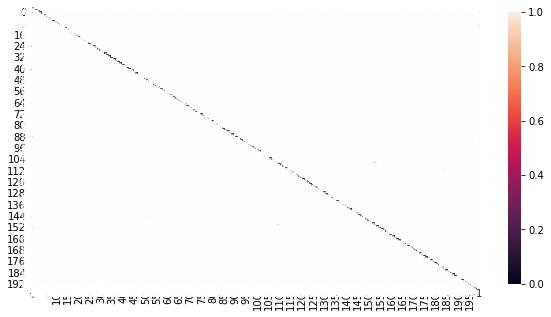

In [55]:
import matplotlib.pyplot as plot
import seaborn as sns
f,ax = plot.subplots(figsize=(10,5))
sns.heatmap(similarity_matrix,annot=True)

# 4：评论分类

## 4.1 ：支持向量机（SVM）原理

In [21]:
def produce_data(n_points=1000):

    data = pd.DataFrame()
    
    # 生成虚拟研究数据
    np.random.seed(0)
    # 生成学习特征
    data['practice'] = np.random.random(n_points)
    data['time_period'] = np.random.random(n_points)
    data['error'] = np.random.random(n_points)
    # 生成类别标签
    data['label'] = np.round(data['practice']*data['time_period'] + 0.3 + 0.1*data['error'])
    data['label'][data['practice']>0.8] = 1
    data['label'][data['time_period']>0.8] = 1
    
    return(data)


def plot_pic(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0
    
    # 画出决策边界，我们为每一个点绘制一个颜色

    step = .01  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 绘图
    Z = Z.reshape(xx.shape)
    plot.xlim(xx.min(), xx.max())
    plot.ylim(yy.min(), yy.max())

    plot.pcolormesh(xx, yy, Z, cmap=plot.cm.RdYlBu)


    data = X_test.copy()
    data['label'] = y_test
    
    practice_fail = data[data['label']==0]['practice']
    time_period_fail = data[data['label']==0]['time_period']
    practice_pass = data[data['label']==1]['practice']
    time_period_pass = data[data['label']==1]['time_period']


    plot.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
    plot.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
    plot.legend()
    plot.xlabel('practice')
    plot.ylabel('time_period')
    plot.legend(loc='upper right')

In [22]:
# 生成测试数据集
data = produce_data()

In [23]:
data.head()

,practice,time_period,error,label
0,0.548814,0.592880,0.811518,1.0
1,0.715189,0.010064,0.476084,0.0
2,0.602763,0.475826,0.523156,1.0
3,0.544883,0.708770,0.250521,1.0
4,0.423655,0.043975,0.605043,0.0


In [24]:
# 准备训练集，测试集数据，
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = \
train_test_split(data[['practice', 'time_period']], data['label'], test_size=0.25)

In [25]:
#把训练集的属性和标签合并在一起；
train_data = features_train.copy()     
train_data['label'] = label_train
train_data.head()

,practice,time_period,label
340,0.370853,0.258059,0.0
821,0.000546,0.340605,0.0
154,0.123820,0.800256,1.0
985,0.492361,0.342226,1.0
996,0.514922,0.721198,1.0


In [26]:
train_data.to_csv('SVM算法训练样本.csv',encoding="utf_8_sig") 

In [27]:
#为了画图做准备，把训练集中标签是fail和pass的给分开筛选出来；
practice_fail = train_data[train_data['label']==0]['practice']
time_period_fail = train_data[train_data['label']==0]['time_period']

practice_pass = train_data[train_data['label']==1]['practice']
time_period_pass = train_data[train_data['label']==1]['time_period']

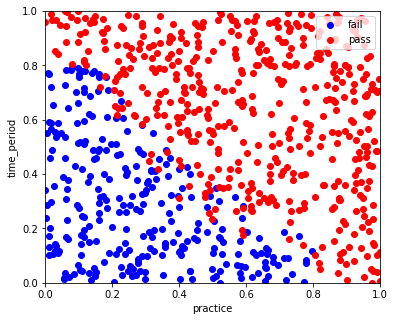

In [28]:
# 数据集图形可视化
plot.figure(figsize = (6,5))
plot.xlim(0.0, 1.0)
plot.ylim(0.0, 1.0)
plot.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
plot.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
plot.xlabel('practice')
plot.ylabel('time_period')
plot.legend(loc='upper right')

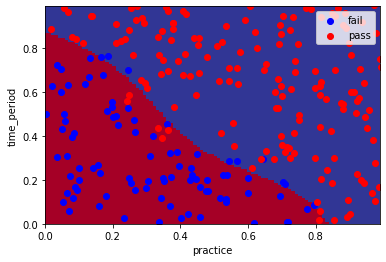

In [29]:
from sklearn.svm import SVC 

clf_SVC = SVC()                               #默认的核函数就是rbf；
clf_SVC.fit(features_train,label_train)       #训练；
pred_SVC = clf_SVC.predict(features_test)     #返回是测试集的预测的label；

plot_pic(clf_SVC, features_test, label_test)

In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC, label_test)    #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc

0.94

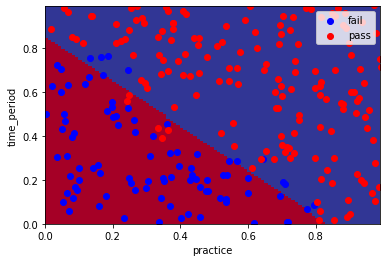

In [31]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'linear')
clf_SVC2.fit(features_train,label_train)
pred_SVC2 = clf_SVC2.predict(features_test)

plot_pic(clf_SVC2, features_test, label_test)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.932

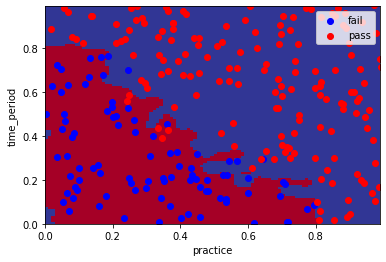

In [33]:
from sklearn.svm import SVC

clf_SVC3 = SVC(kernel = 'rbf',gamma = 1000 )      #设定核函数系数gamma=1000
clf_SVC3.fit(features_train,label_train)
pred_SVC3 = clf_SVC3.predict(features_test)

plot_pic(clf_SVC3, features_test, label_test)

In [34]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC3, label_test)
acc

0.964

In [35]:
#人工对爬取的200条评论进行分类
labels_true = [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1]

In [36]:
from sklearn.svm import SVC 

clf_SVC = SVC()                               
clf_SVC.fit(pd.DataFrame(np.round(comment_vectorization_tv_ndarray, 2)),pd.Series(labels_true))       #训练；


SVC()

### 4.2 SVM分类算法应用（自动给新评论分类）

In [37]:
new_doc = '香港 祖国 红色 五星红旗 团结 感人 苦了 中华儿女 2008 陈凯歌 徐峥 黄渤 男孩 奥运 女排'

In [38]:
new_comment_vectorization_tv_df = pd.DataFrame(np.round(statistics_tv.transform([new_doc]).toarray(), 2), 
             columns=statistics_tv.get_feature_names())
new_comment_vectorization_tv_df.to_csv('新评论特征向量提取.csv',encoding="utf_8_sig")
new_comment_vectorization_tv_df

,00,08,10,15,155,16,20,2008,2009,21,...,黄渤,黄渤宋佳,黄色,黑色幽默,默默无闻,黯淡无光,鼓掌,鼻子,齐聚,齐飞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.37,0.0,0.0,...,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
pred_SVC = clf_SVC.predict(new_comment_vectorization_tv_df)     #返回是测试集的预测的label；

In [40]:
pred_SVC

array([1], dtype=int64)

# 5：评论聚类

### 5.1：k-means 聚类原理

In [61]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [62]:
data = pd.read_csv('k-mean.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


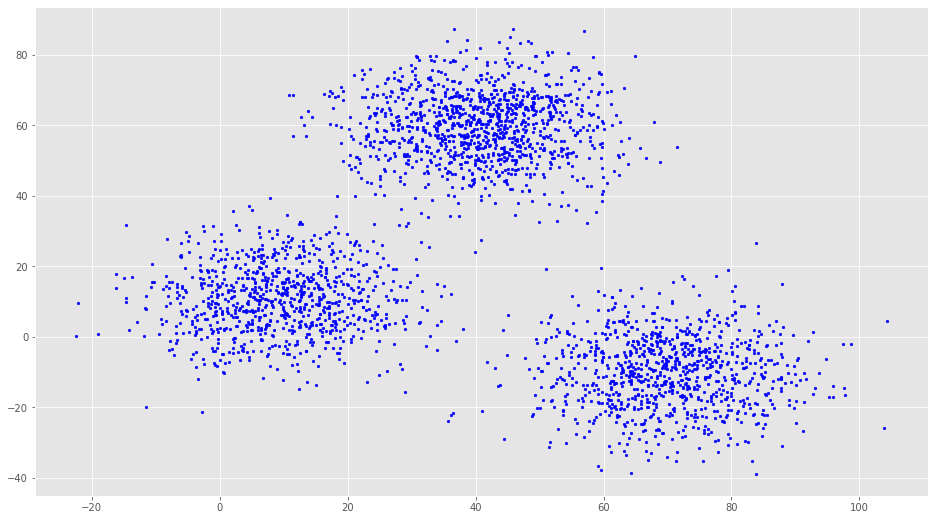

In [63]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='b', s=7)

In [64]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [65]:
k = 3
# 随机选择中心坐标
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[25. 54.]
 [ 5. 51.]
 [22. 34.]]


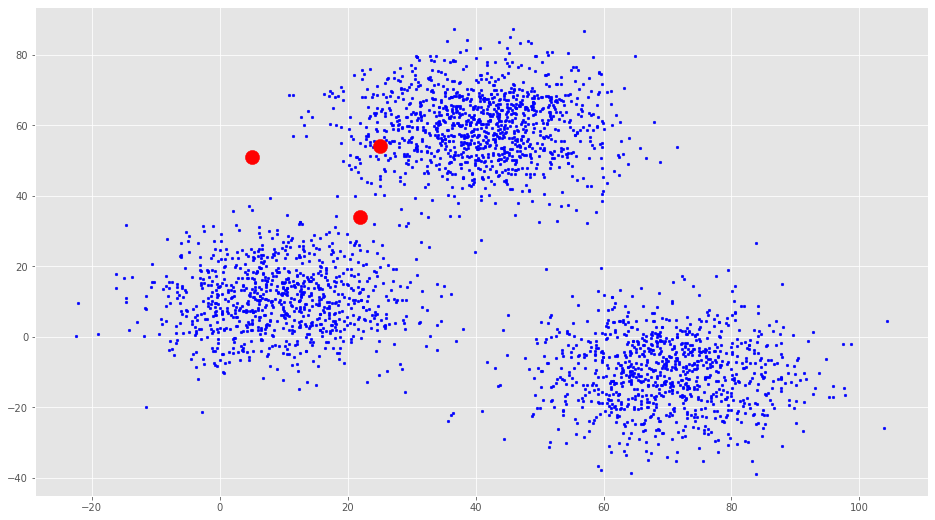

In [66]:
# 画中心点
plt.scatter(f1, f2, c='b', s=7)
plt.scatter(C_x, C_y, marker='o', s=200, c='r')

In [67]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

error = dist(C, C_old, None)
# 循环直到误差达到一定精度
while error != 0:
    
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

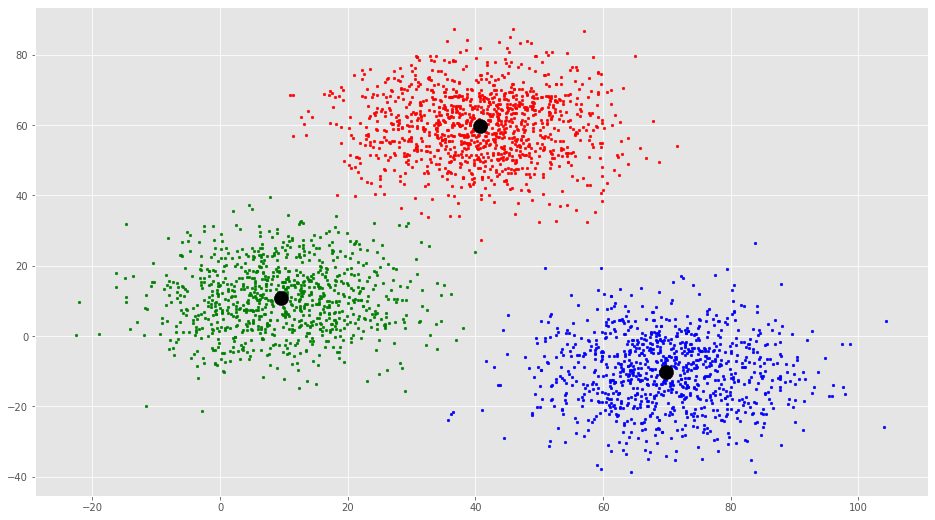

In [68]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='o', s=200, c='k')

In [69]:
X   #中心点坐标

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [71]:
print(C) 
print(centroids) 

[[ 40.683628  59.715893]
 [  9.478045  10.686052]
 [ 69.92419  -10.119641]]
[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

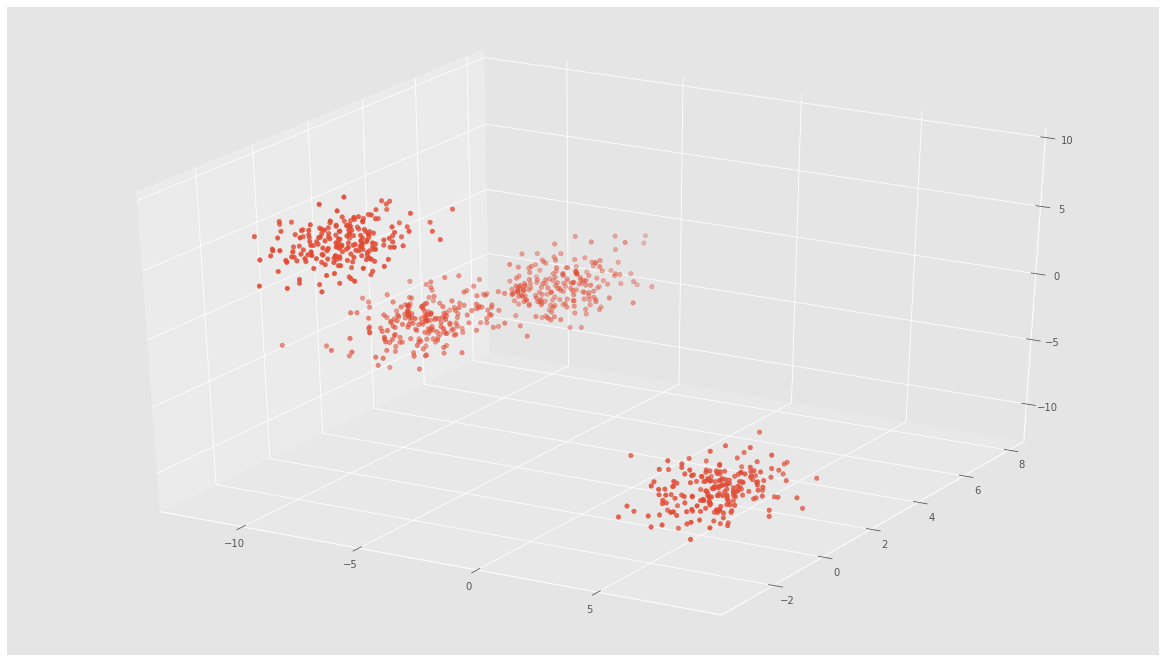

In [75]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [76]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

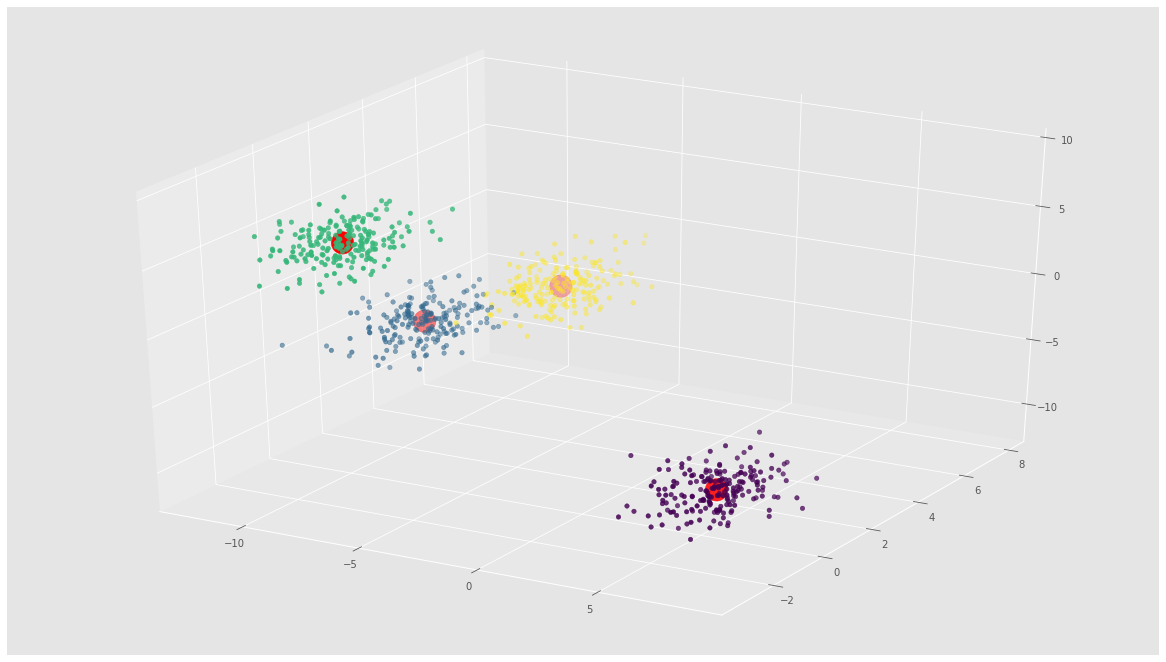

In [77]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='r', s=500)

In [78]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2)

In [79]:
kmeans.fit(comment_vectorization_tv_ndarray)

KMeans(n_clusters=2)

In [80]:
kmeans.cluster_centers_

array([[ 1.33584782e-03,  3.10133966e-03,  3.32133690e-03, ...,
        -2.81892565e-18,  1.44627844e-03,  1.09981325e-03],
       [-6.50521303e-19,  4.93956752e-03, -2.60208521e-18, ...,
         5.63589454e-03,  8.67361738e-19,  5.42101086e-19]])

In [81]:
kmeans.inertia_

191.92040189334642

In [91]:
kmeans.fit_predict(comment_vectorization_tv_ndarray)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1])

## 5.2 聚类效果评价

In [162]:
from sklearn import metrics
# 人工进行分类
labels_true = [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1]
labels_pred = list(kmeans.fit_predict(comment_vectorization_tv_ndarray))
metrics.adjusted_rand_score(labels_true, labels_pred)

0.64473687437178